**KAGGLE 데이터 등록 및 연동**

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seungminara","key":"9303d5cc868f28f815bba5001d6a3e12"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-17 20:28:04           7769  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4735  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1588  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2251  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
! kaggle datasets download -d bryanpark/korean-single-speaker-speech-dataset

100% 2.86G/2.86G [00:44<00:00, 11.9MB/s]
100% 2.86G/2.86G [00:44<00:00, 68.8MB/s]


In [8]:
!ls

kaggle.json  korean-single-speaker-speech-dataset.zip  sample_data


In [9]:
!unzip korean-single-speaker-speech-dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: kss/4/4_0633.wav        
  inflating: kss/4/4_0634.wav        
  inflating: kss/4/4_0635.wav        
  inflating: kss/4/4_0636.wav        
  inflating: kss/4/4_0637.wav        
  inflating: kss/4/4_0638.wav        
  inflating: kss/4/4_0639.wav        
  inflating: kss/4/4_0640.wav        
  inflating: kss/4/4_0641.wav        
  inflating: kss/4/4_0642.wav        
  inflating: kss/4/4_0643.wav        
  inflating: kss/4/4_0644.wav        
  inflating: kss/4/4_0645.wav        
  inflating: kss/4/4_0646.wav        
  inflating: kss/4/4_0647.wav        
  inflating: kss/4/4_0648.wav        
  inflating: kss/4/4_0649.wav        
  inflating: kss/4/4_0650.wav        
  inflating: kss/4/4_0651.wav        
  inflating: kss/4/4_0652.wav        
  inflating: kss/4/4_0653.wav        
  inflating: kss/4/4_0654.wav        
  inflating: kss/4/4_0655.wav        
  inflating: kss/4/4_0656.wav        
  inflating: kss/4/4_0657.wav        
  inflating: k

In [14]:
!ls

kaggle.json				  kss	       transcript.v.1.4.txt
korean-single-speaker-speech-dataset.zip  sample_data


**데이터 전처리**

In [15]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 비어있는 리스트 만들기
data=[]

# transcript 파일 열기
# 파일 변수를 f로 설정한다.
with open('transcript.v.1.4.txt', encoding='utf-8') as f:

    # f 파일에 대해 line으로 반복문 실행.
    for line in f:

        # 텍스트 라인을 | 구분으로 나눈다
        parts = line.strip().split('|')

        # 한글,영어,시간,경로를 라인별로 변수화한다.
        kor = parts[1]
        eng = parts[5]
        sec = parts[4]
        path = parts[0]

        # 빈 data 리스트에 append한다.
        data.append([path,kor,eng,sec])

# data를 DataFrame으로 만듬
# 열 이름은 path,kor,eng,sec
df = pd.DataFrame(data,columns=['path','kor','eng','sec'])

# 한글,영어 텍스트에 대한 길이를 만듬
df['kor_len'] = df['kor'].apply(lambda x : len(x))
df['eng_len'] = df['eng'].apply(lambda x : len(x))
df.sec=df.sec.astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


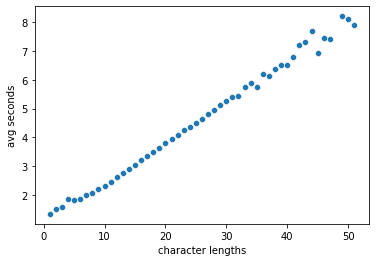

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


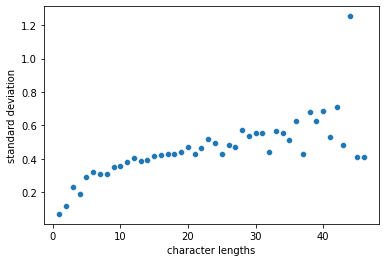

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


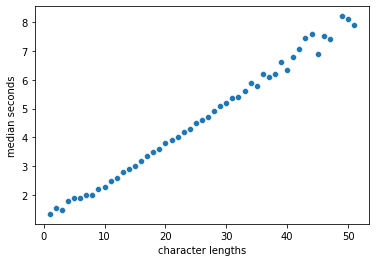

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


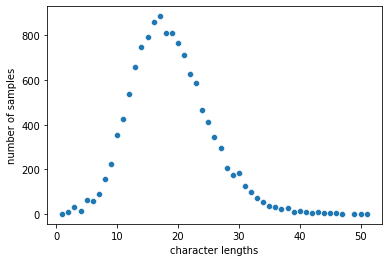

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


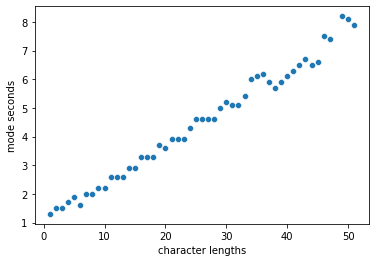

In [17]:
df1 = df.groupby('kor_len')
mylist = []
for str_len,data in df1:
    grp_mean = data.sec.mean() # 평균
    grp_std = data.sec.std() # 표준편차
    grp_median =  data.sec.median() # 중앙값
    grp_count = len(data) # 샘플 숫자
    grp_mode = data.sec.mode() # 최빈값


    mylist.append([str_len,grp_mean,grp_std,grp_median,grp_count,grp_mode[0]])
  
df2 = pd.DataFrame(mylist,columns=['character lengths','avg seconds','standard deviation','median seconds','number of samples','mode seconds'])

for i in df2.columns:
    if i != 'character lengths':
        sns.scatterplot(df2['character lengths'], df2[i])
        plt.show()